In [653]:
import pandas as pd
import numpy as np

In [654]:
df_train = pd.read_pickle('C:\ML\тестовое задание 20240821\\train.pkl')
df_test = pd.read_pickle('C:\ML\тестовое задание 20240821\\test_oot.pkl')

In [655]:
df_train.head()

,application_id_axi,axilink_key,application_date,countclosedloan,sourcedeviceclientformcount,sourceipclientformcount,customerincomecurrent,requestlimit,educationapplication,countuniqedevicepern,...,maxdayssincetruephone365nbki,cntuniquephones365nbki,reg_address_index,liv_address_index,reg_address_house,liv_address_house,reg_address_flat,liv_address_flat,segment,set_type
0,5619264-1,10,2023-12-01,0,0,25,74929,4000,2,0,...,82.0,2.0,300000,300000,41,41,None,None,SR,train
1,5619295-1,10,2023-12-01,0,2,0,88012,20000,3,0,...,73.0,3.0,142015,142000,29,25,None,396,Loan,train
2,5619309-1,10,2023-12-01,0,49,9,70000,5000,4,0,...,-1.0,1.0,603071,603071,56,56,140,140,SR,train
3,5619327-1,10,2023-12-01,0,36,0,31000,6000,3,0,...,6.0,2.0,636703,620102,13а,93,None,151,SR,train
4,5619404-1,10,2023-12-01,0,0,0,60000,10000,4,0,...,8.0,3.0,111141,111141,36,36,49,49,Loan,train


In [656]:
df_train['fpd15']


0        NaN
1        0.0
2        NaN
3        NaN
4        0.0
        ... 
54953    1.0
54954    0.0
54955    0.0
54956    NaN
54957    1.0
Name: fpd15, Length: 43570, dtype: float16

In [657]:
categorical_columns = df_train.select_dtypes(include=['object', 'category', 'bool']).columns

In [658]:
categorical_columns

Index(['application_id_axi', 'application_date', 'usingdaysprevloan',
       'cntdaysfromclosedlastloan', 'cntrejafterloan',
       'cntlongpreviousloantotal', 'isbankingcardchangedfromprevloan',
       'onemployername', 'ofgender', 'workoccupation', 'workposition',
       'familyincomeapplication', 'onbirthdate', 'gosusl',
       'onpassportissuedate', 'cntdaysfromclosedfirstloan', 'photo_card_type',
       'photo_passport_type', 'photo_selfie_type', 'photo_reg_type',
       'reg_address_index', 'liv_address_index', 'reg_address_house',
       'liv_address_house', 'reg_address_flat', 'liv_address_flat', 'segment',
       'set_type'],
      dtype='object')

In [659]:
# Применим WOE encoding для категориальных признаков

In [660]:
def calculate_woe(df, feature, target):
    good = df[df[target] == 0].groupby(feature).size()
    bad = df[df[target] == 1].groupby(feature).size()

    total_good = len(df[df[target] == 0])
    total_bad = len(df[df[target] == 1])

    woe = np.log((good / total_good) / (bad / total_bad)).replace([np.inf, -np.inf], 0).fillna(0)
    return woe.to_dict()

In [661]:
target_column = 'fpd15'

for col in categorical_columns:
    woe_dict = calculate_woe(df_train, col, target_column)
    df_train[col + '_WOE'] = df_train[col].map(woe_dict)

In [662]:
df_train.drop(columns=categorical_columns, inplace=True)

In [663]:
df_train

,axilink_key,countclosedloan,sourcedeviceclientformcount,sourceipclientformcount,customerincomecurrent,requestlimit,educationapplication,countuniqedevicepern,ofmaxdpd,maxdpdprevloan,...,photo_selfie_type_WOE,photo_reg_type_WOE,reg_address_index_WOE,liv_address_index_WOE,reg_address_house_WOE,liv_address_house_WOE,reg_address_flat_WOE,liv_address_flat_WOE,segment_WOE,set_type_WOE
0,10,0,0,25,74929,4000,2,0,0,NaN,...,-0.001500,-0.00623,0.000000,0.000000,-0.105592,-0.025305,NaN,NaN,0.0,0.0
1,10,0,2,0,88012,20000,3,0,0,NaN,...,-0.001500,-0.00623,0.000000,0.000000,-0.094484,-0.002832,NaN,-0.377526,0.0,0.0
2,10,0,49,9,70000,5000,4,0,0,NaN,...,-0.001500,-0.00623,NaN,0.000000,-0.089844,0.040209,1.088811,1.126552,0.0,0.0
3,10,0,36,0,31000,6000,3,0,0,NaN,...,-0.001500,-0.00623,0.000000,0.027939,-0.009801,-0.377526,NaN,1.701916,0.0,0.0
4,10,0,0,0,60000,10000,4,0,0,NaN,...,-0.001500,-0.00623,0.000000,0.000000,0.271658,0.310231,0.005466,0.045331,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54953,10,0,56,2,60000,30000,3,0,0,NaN,...,-0.001500,-0.00623,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0,0.0
54954,10,0,46,0,58000,15000,5,0,0,NaN,...,-0.001500,-0.00623,0.000000,0.000000,0.273062,0.266831,-0.066778,-0.099438,0.0,0.0
54955,10,0,87,29,28387,7000,2,0,0,NaN,...,-0.001500,-0.00623,-2.169285,-2.169285,-0.066854,-0.110402,NaN,NaN,0.0,0.0
54956,10,0,262,0,60000,30000,2,0,0,NaN,...,0.541934,-0.00623,-1.188456,0.000000,0.044231,0.310231,NaN,NaN,0.0,0.0


In [664]:
# Займемся сокращением кол-ва признаков(столбцов)

In [665]:
# Первый метод - удалим признаки с низкой дисперсией

In [666]:
variances = df_train.var()
threshold = 0.1
variances

axilink_key                    0.000000e+00
countclosedloan                0.000000e+00
sourcedeviceclientformcount    1.412133e+08
sourceipclientformcount        1.014870e+04
customerincomecurrent          2.740393e+09
                                   ...     
liv_address_house_WOE          8.895539e-02
reg_address_flat_WOE           1.065395e-01
liv_address_flat_WOE           1.103675e-01
segment_WOE                    0.000000e+00
set_type_WOE                   0.000000e+00
Length: 2289, dtype: float64

In [667]:
variances.value_counts().sort_values()

1.129981e+12      1
2.644043e-01      1
2.430420e-01      1
1.562121e+09      1
2.990723e-02      1
               ... 
2.112500e+01      3
1.899200e+04      4
2.332764e-01      4
0.000000e+00     88
inf             191
Length: 1818, dtype: int64

In [668]:
columns_low_var = variances[variances > threshold].index
columns_low_var

Index(['sourcedeviceclientformcount', 'sourceipclientformcount',
       'customerincomecurrent', 'requestlimit', 'educationapplication',
       'maxdpdprevloan', 'minusingtotal', 'cntpromiseall',
       'allapplicationfrom', 'sumpaymentall',
       ...
       'mindayssincetruephone365nbki', 'maxdayssincetruephone365nbki',
       'cntuniquephones365nbki', 'onemployername_WOE', 'onbirthdate_WOE',
       'onpassportissuedate_WOE', 'reg_address_index_WOE',
       'liv_address_index_WOE', 'reg_address_flat_WOE',
       'liv_address_flat_WOE'],
      dtype='object', length=1775)

In [669]:
df_train_1 = df_train[columns_low_var]

In [670]:
df_train_1.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\chage\AppData\Local\Temp\ipykernel_18228\224988744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1.replace([np.inf, -np.inf], np.nan, inplace=True)


In [671]:
for i in np.isinf(df_1).sum().values:
    if i != 0:
        print(i)

In [672]:
# Также можно было посмотреть столбцы с большим кол-вом пустых значений или неуникальными значениями,
# но они были отброшены уже на этапе удаления столбцов с низкой дисперсией

In [673]:
empty = df_train_1.columns[df_train_1.isnull().all()]

In [674]:
empty

Index([], dtype='object')

In [675]:
null_counts = df_train_1.isnull().sum()

In [676]:
null_counts

sourcedeviceclientformcount        0
sourceipclientformcount            0
customerincomecurrent              0
requestlimit                       0
educationapplication               0
                               ...  
onpassportissuedate_WOE          633
reg_address_index_WOE           5084
liv_address_index_WOE           5043
reg_address_flat_WOE           13687
liv_address_flat_WOE           12935
Length: 1775, dtype: int64

In [677]:
df_train_1.dtypes

sourcedeviceclientformcount      int32
sourceipclientformcount          int16
customerincomecurrent            int32
requestlimit                     int16
educationapplication             int16
                                ...   
onpassportissuedate_WOE        float64
reg_address_index_WOE          float64
liv_address_index_WOE          float64
reg_address_flat_WOE           float64
liv_address_flat_WOE           float64
Length: 1775, dtype: object

In [678]:
unique_counts = df_train_1.nunique()

In [679]:
unique_counts

sourcedeviceclientformcount    5870
sourceipclientformcount         232
customerincomecurrent          1663
requestlimit                     30
educationapplication              7
                               ... 
onpassportissuedate_WOE          86
reg_address_index_WOE            47
liv_address_index_WOE            52
reg_address_flat_WOE            166
liv_address_flat_WOE            164
Length: 1775, dtype: int64

In [680]:
# Второй метод - построит матрицу корреляции для определения взаимосвязи признаков и удалим признаки с высокой корреляцией

In [681]:
corr_matrix = df_train_1.corr()

In [682]:
corr_matrix = corr_matrix.abs()
corr_matrix

,sourcedeviceclientformcount,sourceipclientformcount,customerincomecurrent,requestlimit,educationapplication,maxdpdprevloan,minusingtotal,cntpromiseall,allapplicationfrom,sumpaymentall,...,mindayssincetruephone365nbki,maxdayssincetruephone365nbki,cntuniquephones365nbki,onemployername_WOE,onbirthdate_WOE,onpassportissuedate_WOE,reg_address_index_WOE,liv_address_index_WOE,reg_address_flat_WOE,liv_address_flat_WOE
sourcedeviceclientformcount,1.000000,0.002679,0.012059,0.011430,0.010482,0.047814,0.093783,0.007119,0.027284,0.003800,...,0.007377,0.014408,0.006325,0.015600,0.010320,0.003385,0.014643,0.011876,0.002275,0.001918
sourceipclientformcount,0.002679,1.000000,0.009507,0.003023,0.008435,0.004369,0.021409,0.000868,0.006008,0.001649,...,0.004842,0.013389,0.001394,0.004816,0.008211,0.010471,0.001532,0.001040,0.001584,0.004296
customerincomecurrent,0.012059,0.009507,1.000000,0.208883,0.321546,0.214729,0.213162,0.001437,0.032997,0.013759,...,0.009730,0.004228,0.135614,0.022061,0.019443,0.002323,0.024831,0.030663,0.031717,0.031323
requestlimit,0.011430,0.003023,0.208883,1.000000,0.163368,0.116914,0.147057,0.007494,0.112351,0.002032,...,0.020402,0.014026,0.117656,0.013893,0.012871,0.009125,0.009466,0.010727,0.005763,0.008262
educationapplication,0.010482,0.008435,0.321546,0.163368,1.000000,0.307769,0.141566,0.006411,0.042909,0.018396,...,0.004885,0.006658,0.118410,0.043297,0.022973,0.002019,0.024373,0.029790,0.041042,0.042027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
onpassportissuedate_WOE,0.003385,0.010471,0.002323,0.009125,0.002019,0.039780,0.045037,0.004566,0.010641,0.005623,...,0.005111,0.006597,0.004675,0.036126,0.084951,1.000000,0.080747,0.083430,0.028626,0.027872
reg_address_index_WOE,0.014643,0.001532,0.024831,0.009466,0.024373,0.089933,0.082584,0.001341,0.008431,0.003671,...,0.011407,0.000065,0.017152,0.070445,0.112549,0.080747,1.000000,0.877852,0.032957,0.035763
liv_address_index_WOE,0.011876,0.001040,0.030663,0.010727,0.029790,0.144233,0.149223,0.005355,0.008034,0.001194,...,0.012092,0.001403,0.017417,0.062003,0.111083,0.083430,0.877852,1.000000,0.035040,0.034500
reg_address_flat_WOE,0.002275,0.001584,0.031717,0.005763,0.041042,0.052847,0.156190,0.016582,0.007183,0.012045,...,0.005085,0.001992,0.010917,0.020058,0.042651,0.028626,0.032957,0.035040,1.000000,0.860596


In [683]:
upper_triangle = corr_matrix.where(
    pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))

C:\Users\chage\AppData\Local\Temp\ipykernel_18228\3723838410.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))


In [684]:
upper_triangle

,sourcedeviceclientformcount,sourceipclientformcount,customerincomecurrent,requestlimit,educationapplication,maxdpdprevloan,minusingtotal,cntpromiseall,allapplicationfrom,sumpaymentall,...,mindayssincetruephone365nbki,maxdayssincetruephone365nbki,cntuniquephones365nbki,onemployername_WOE,onbirthdate_WOE,onpassportissuedate_WOE,reg_address_index_WOE,liv_address_index_WOE,reg_address_flat_WOE,liv_address_flat_WOE
sourcedeviceclientformcount,NaN,0.002679,0.012059,0.011430,0.010482,0.047814,0.093783,0.007119,0.027284,0.003800,...,0.007377,0.014408,0.006325,0.015600,0.010320,0.003385,0.014643,0.011876,0.002275,0.001918
sourceipclientformcount,NaN,NaN,0.009507,0.003023,0.008435,0.004369,0.021409,0.000868,0.006008,0.001649,...,0.004842,0.013389,0.001394,0.004816,0.008211,0.010471,0.001532,0.001040,0.001584,0.004296
customerincomecurrent,NaN,NaN,NaN,0.208883,0.321546,0.214729,0.213162,0.001437,0.032997,0.013759,...,0.009730,0.004228,0.135614,0.022061,0.019443,0.002323,0.024831,0.030663,0.031717,0.031323
requestlimit,NaN,NaN,NaN,NaN,0.163368,0.116914,0.147057,0.007494,0.112351,0.002032,...,0.020402,0.014026,0.117656,0.013893,0.012871,0.009125,0.009466,0.010727,0.005763,0.008262
educationapplication,NaN,NaN,NaN,NaN,NaN,0.307769,0.141566,0.006411,0.042909,0.018396,...,0.004885,0.006658,0.118410,0.043297,0.022973,0.002019,0.024373,0.029790,0.041042,0.042027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
onpassportissuedate_WOE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.080747,0.083430,0.028626,0.027872
reg_address_index_WOE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877852,0.032957,0.035763
liv_address_index_WOE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035040,0.034500
reg_address_flat_WOE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860596


In [685]:
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

In [686]:
df_wo_high_corr = df_without_low_var.drop(columns=high_corr_columns)

In [687]:
df_train_2 = df_train_1.drop(columns=high_corr_columns)
df_train_2

,sourcedeviceclientformcount,sourceipclientformcount,customerincomecurrent,requestlimit,educationapplication,maxdpdprevloan,minusingtotal,cntpromiseall,allapplicationfrom,sumpaymentall,...,cntphones365nbki,mindayssincetruephone365nbki,maxdayssincetruephone365nbki,onemployername_WOE,onbirthdate_WOE,onpassportissuedate_WOE,reg_address_index_WOE,liv_address_index_WOE,reg_address_flat_WOE,liv_address_flat_WOE
0,0,25,74929,4000,2,NaN,NaN,0,3,0.0,...,2.0,82.0,82.0,NaN,0.000000,-1.476138,0.000000,0.000000,NaN,NaN
1,2,0,88012,20000,3,NaN,NaN,0,2,0.0,...,3.0,73.0,73.0,0.000000,0.000000,0.027939,0.000000,0.000000,NaN,-0.377526
2,49,9,70000,5000,4,NaN,NaN,0,1,0.0,...,1.0,999999.0,-1.0,0.133300,NaN,-1.070673,NaN,0.000000,1.088811,1.126552
3,36,0,31000,6000,3,NaN,NaN,0,1,0.0,...,2.0,6.0,6.0,0.000000,0.133300,0.000000,0.000000,0.027939,NaN,1.701916
4,0,0,60000,10000,4,NaN,NaN,0,1,0.0,...,3.0,8.0,8.0,-0.782991,0.000000,0.000000,0.000000,0.000000,0.005466,0.045331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54953,56,2,60000,30000,3,NaN,NaN,0,1,0.0,...,2.0,190.0,190.0,NaN,0.000000,-0.600669,0.000000,0.000000,NaN,NaN
54954,46,0,58000,15000,5,NaN,NaN,0,1,0.0,...,1.0,26.0,26.0,NaN,0.000000,-0.377526,0.000000,0.000000,-0.066778,-0.099438
54955,87,29,28387,7000,2,NaN,NaN,0,1,0.0,...,2.0,59.0,59.0,0.000000,0.315621,0.000000,-2.169285,-2.169285,NaN,NaN
54956,262,0,60000,30000,2,NaN,NaN,0,1,0.0,...,1.0,214.0,214.0,-0.782991,0.000000,1.008769,-1.188456,0.000000,NaN,NaN


In [688]:
# Заполним пустые значения средним по столбцам

In [689]:
df_train_filled = df_train_2.fillna(df_train_2.mean())

C:\Anaconda\Anaconda\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [690]:
df_train_filled.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [691]:
# Третий метод - обучить модель логистической регрессии и посмотреть наиболее значимые признаки

In [692]:
X_train = df_train_filled.drop(columns=['fpd15'])
y_train = df_filled['fpd15']
y_train_categorical = pd.cut(y_train, bins=2, labels=[0, 1])  # Разделение на два бина
max_values = X_train.max()

large_value_columns = max_values[max_values > 1e+10]

X_train = X_train.drop(columns=large_value_columns.index)
y_train_categorical

0        0
1        0
2        0
3        0
4        0
        ..
54953    1
54954    0
54955    0
54956    0
54957    1
Name: fpd15, Length: 43570, dtype: category
Categories (2, int64): [0 < 1]

In [693]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train[final_features], y_train_categorical, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled_1 = scaler.transform(X_test_1)

In [694]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_categorical)


LogisticRegression(max_iter=1000)

In [695]:
# from sklearn.metrics import accuracy_score

# y_pred = model.predict(X_test_scaled_1)
# accuracy = accuracy_score(y_test_1, y_pred)
# accuracy
# unique, counts = np.unique(y_pred, return_counts=True)
# for value, count in zip(unique, counts):
#     print(f'Value: {value}, Count: {count}')
# accuracy

In [696]:
feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance.head(20)

avgamtoutst_dcurbalall270badnbki           0.632515
avgamtpastdue_dlimitallgoodnbki            0.556084
avgoutstpastdue_dcurbalall365closednbki    0.547950
sumlimitallclosednbki                      0.530494
sumcurbalall90nbki                         0.453417
avgpaymall14paymtnbki                      0.419313
avgamtpastdue_dcurbalallgoodnbki           0.399169
avgamtpastdue_dcurbalall365badnbki         0.398751
sumamtoutstall90nbki                       0.380507
sumlimitall270badnbki                      0.308678
avgpastdueallclosednbki                    0.301090
sumcurbalall270nbki                        0.289890
sumpaymall7paymtnbki                       0.285091
avglimitall90goodnbki                      0.284387
avgamtoutstall365goodnbki                  0.276517
avgcurbalall180closednbki                  0.251873
avgcurrrequest_doutstall21badnbki          0.239550
sumcurbalall60nbki                         0.237745
avglimitall270closednbki                   0.228189
sumpaymall30

In [697]:
final_features = feature_importance.head(20).index
final_features

X_train_20 = X_train[final_features]

In [698]:
X_test_20 = df_test[final_features].fillna(df_test[final_features].mean())

X_test_20

,avgamtoutst_dcurbalall270badnbki,avgamtpastdue_dlimitallgoodnbki,avgoutstpastdue_dcurbalall365closednbki,sumlimitallclosednbki,sumcurbalall90nbki,avgpaymall14paymtnbki,avgamtpastdue_dcurbalallgoodnbki,avgamtpastdue_dcurbalall365badnbki,sumamtoutstall90nbki,sumlimitall270badnbki,avgpastdueallclosednbki,sumcurbalall270nbki,sumpaymall7paymtnbki,avglimitall90goodnbki,avgamtoutstall365goodnbki,avgcurbalall180closednbki,avgcurrrequest_doutstall21badnbki,sumcurbalall60nbki,avglimitall270closednbki,sumpaymall30activepaymtnbki
2591,16330.000000,0.211304,1.541211,11000.0,9048.0,3000.000000,0.462363,3050.000000,52710.0,46000.0,704.333313,9962.0,3000.0,4000.000000,1458.250000,3320.666748,0.0,9048.0,3666.666748,630.0
2592,24874.000000,0.000000,0.028608,257868.0,269467.0,5348.571289,0.000000,24874.000000,211500.0,18000.0,0.000000,269467.0,99562.0,6979.700195,3110.433350,5994.302246,0.0,269467.0,5764.372070,11713.0
2593,0.000000,0.000000,0.000000,96332.0,20998.0,4540.166504,0.000000,0.000000,231816.0,0.0,0.000000,46467.0,0.0,27777.777344,22437.818359,7554.000000,0.0,20998.0,6666.333496,23127.0
2594,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5000.0,0.0,0.000000,0.0,0.0,5000.000000,5000.000000,0.000000,0.0,0.0,0.000000,0.0
2595,0.000000,0.000000,0.000000,9000.0,11420.0,1520.000000,0.000000,0.000000,61717.0,0.0,0.000000,11420.0,0.0,9857.142578,8816.713867,9000.000000,0.0,10520.0,9000.000000,3220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37836,0.000000,0.000000,0.000000,16000.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,151152.0,0.0,0.000000,10000.000000,0.000000,0.0,0.0,0.000000,10405.0
37837,25249.000000,0.000000,181.889404,409786.0,114025.0,10008.000000,0.000000,13978.333008,134873.0,52300.0,0.000000,274202.0,0.0,9490.500000,2178.196777,7739.350098,0.0,50949.0,6693.516113,9270.0
37838,13089.890625,0.000000,0.000000,68610.0,0.0,3345.000000,0.000000,2762.390625,49167.0,23990.0,0.000000,86312.0,5670.0,9024.000000,9347.727539,4897.500000,0.0,0.0,4001.750000,41390.0
37839,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [699]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_20)
X_test_scaled = scaler.transform(X_test_20)

In [700]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train_categorical)

LogisticRegression()

In [701]:
y_pred = model.predict(X_test_scaled)
unique, counts = np.unique(y_pred, return_counts=True)
for value, count in zip(unique, counts):
    print(f'Value: {value}, Count: {count}')

Value: 0, Count: 11384
Value: 1, Count: 4


In [702]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

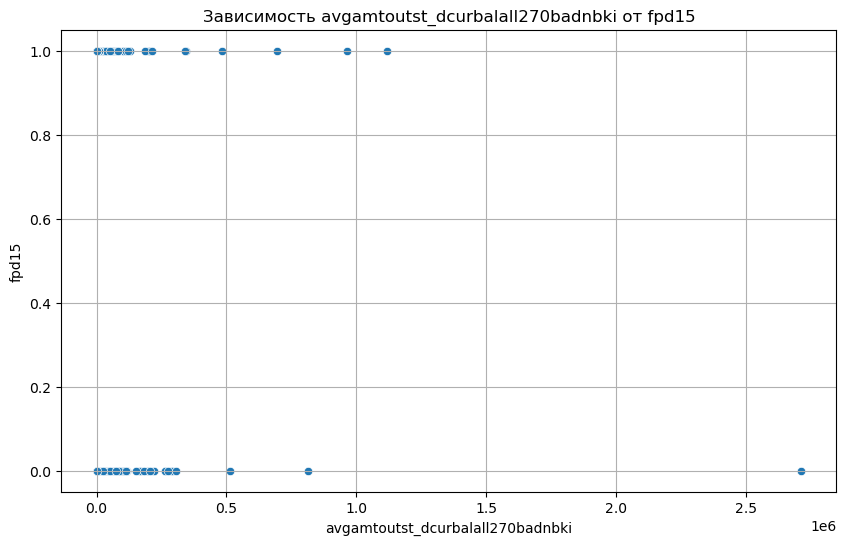

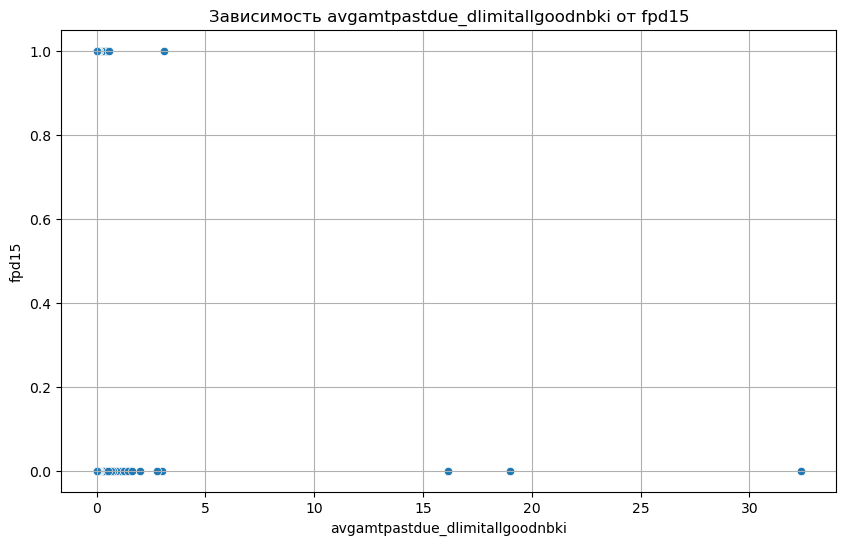

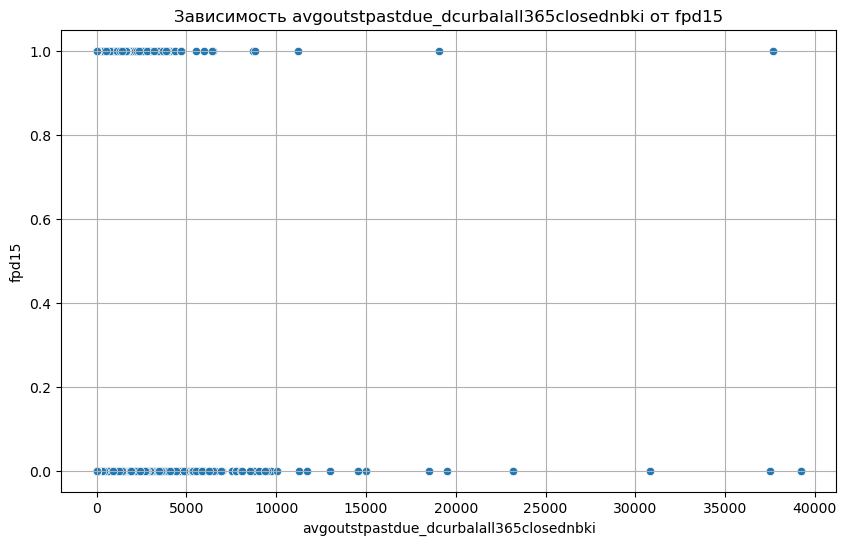

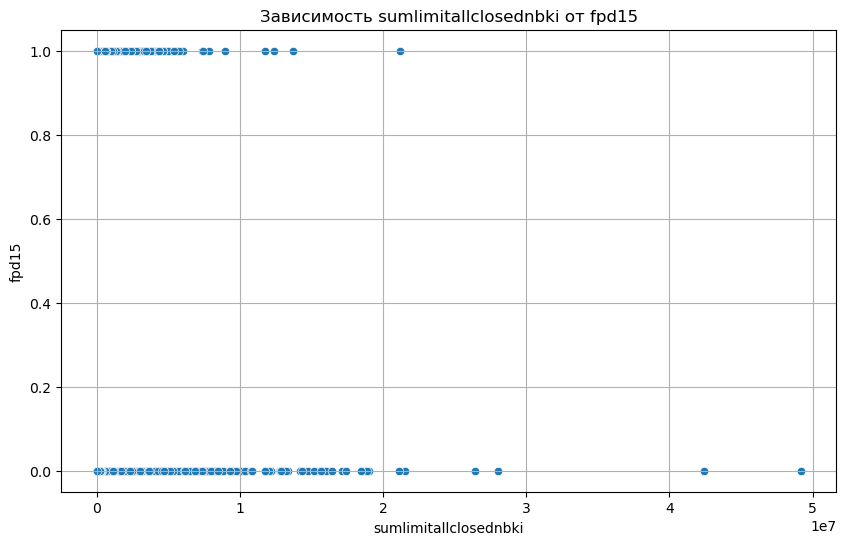

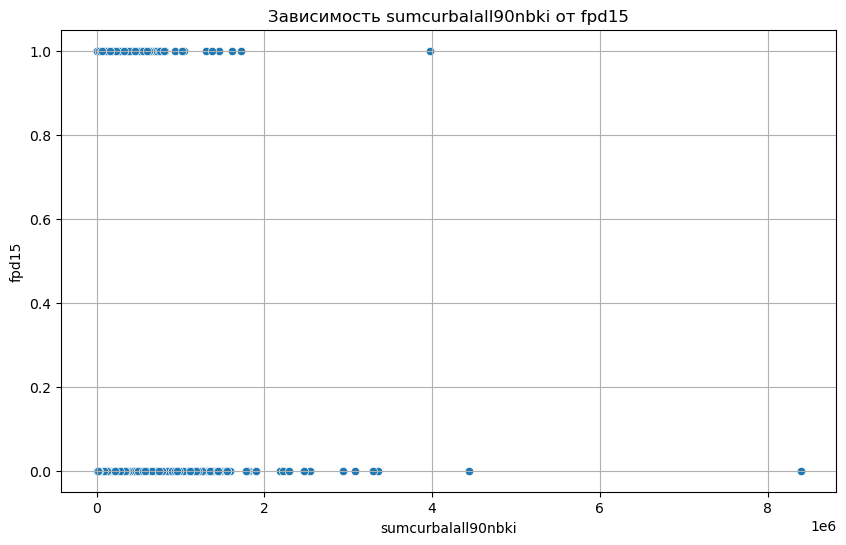

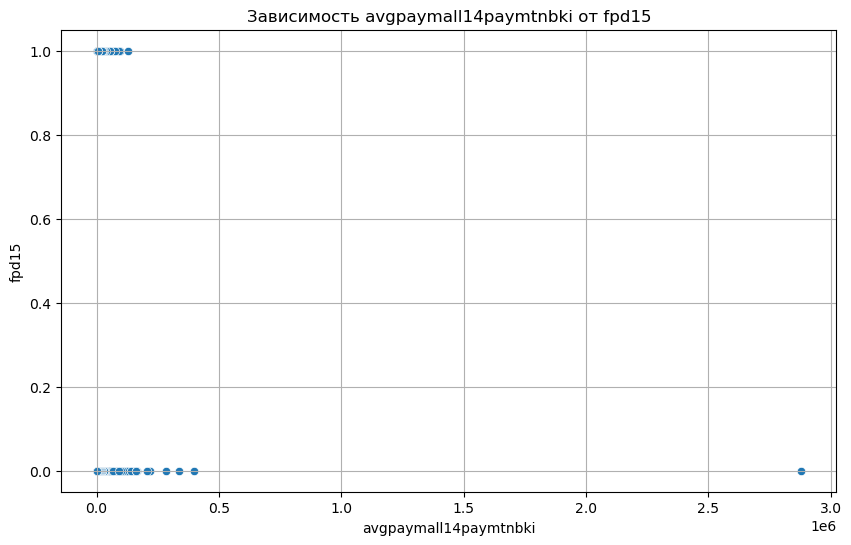

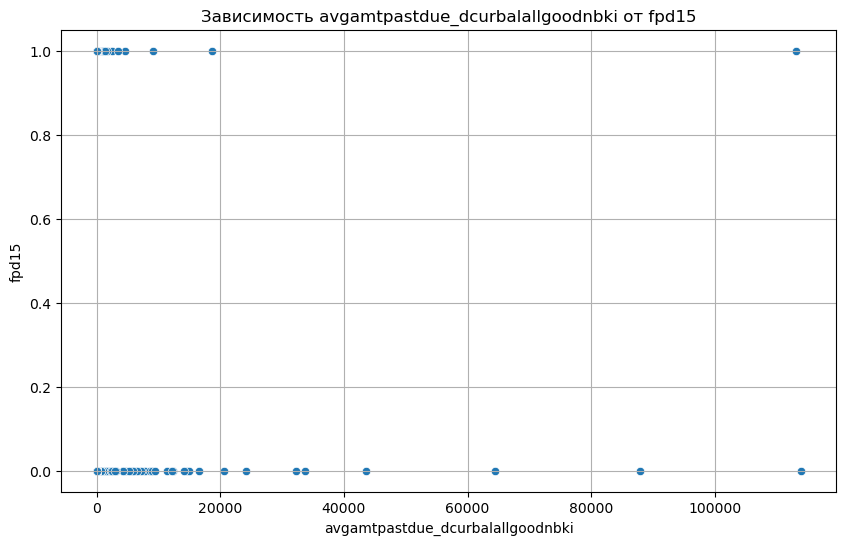

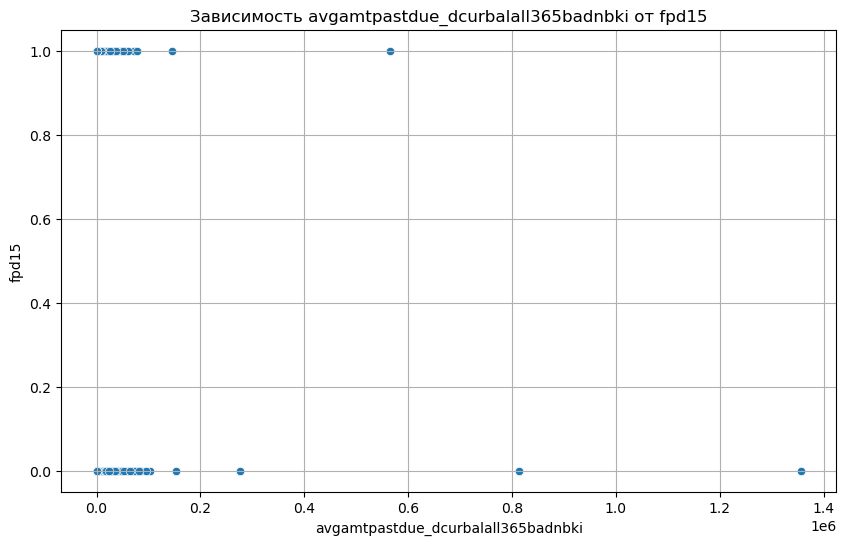

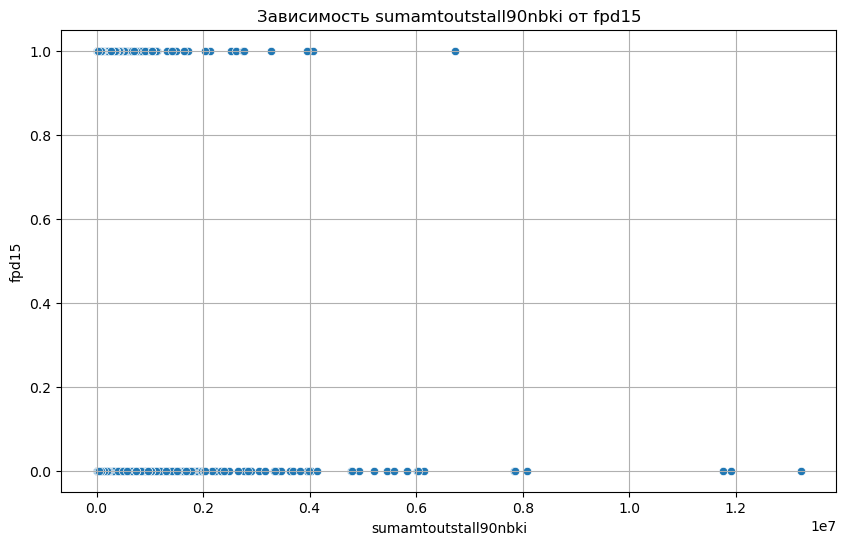

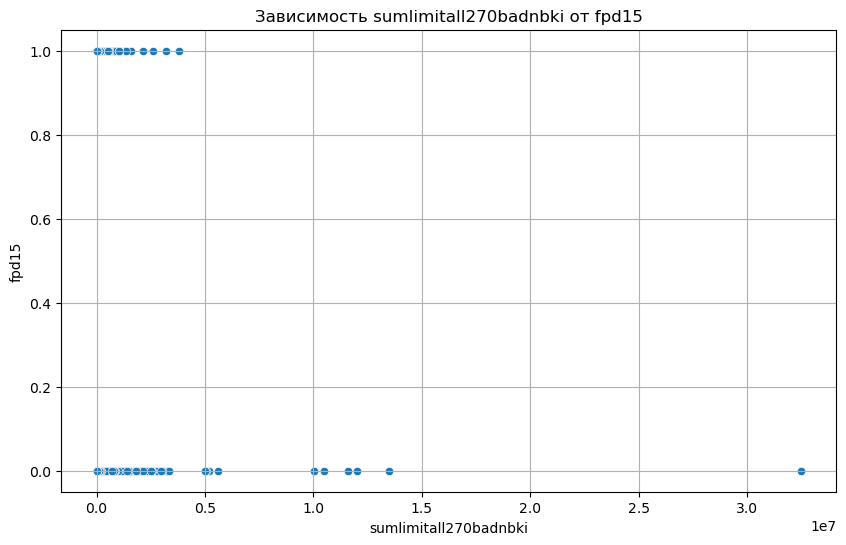

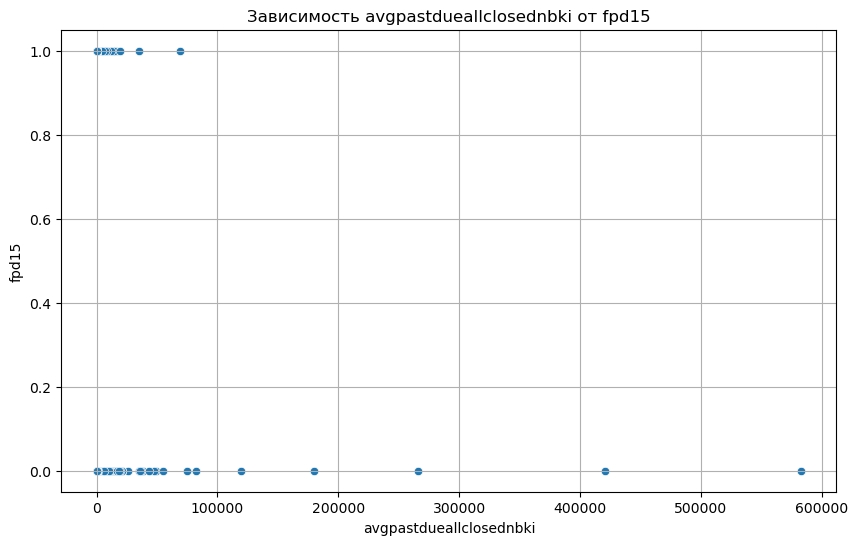

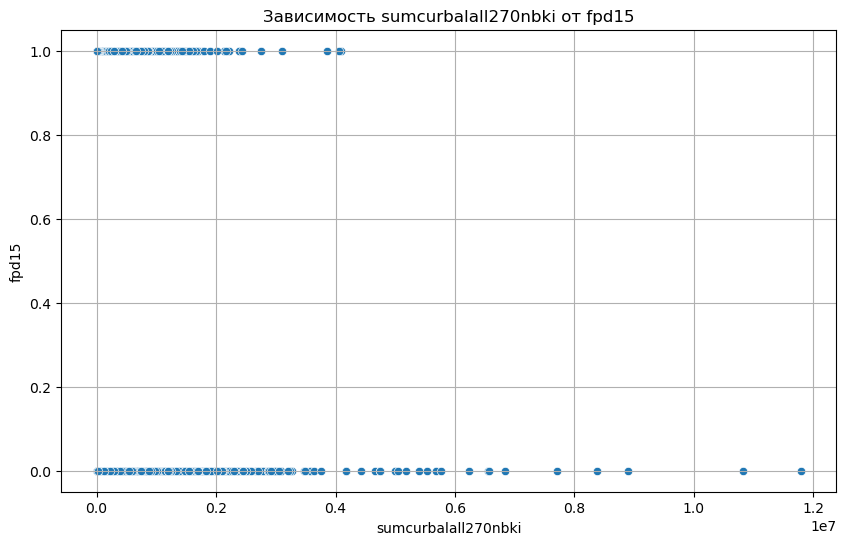

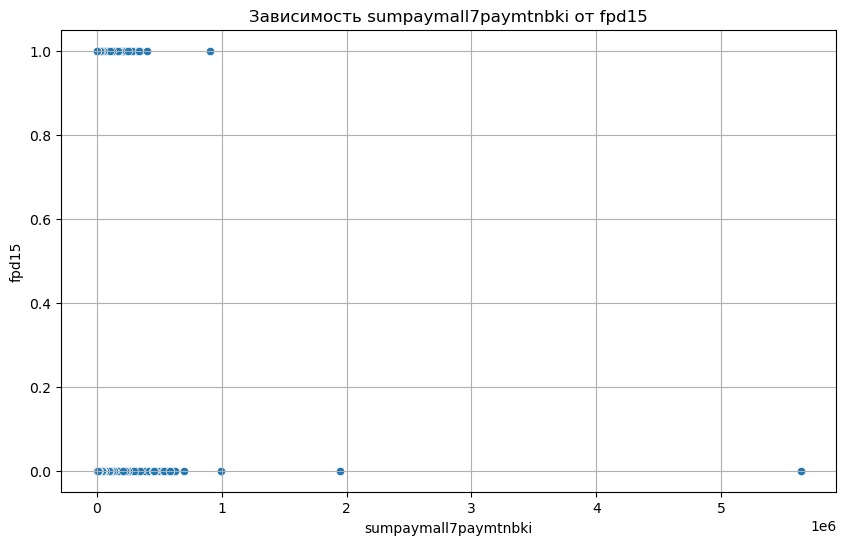

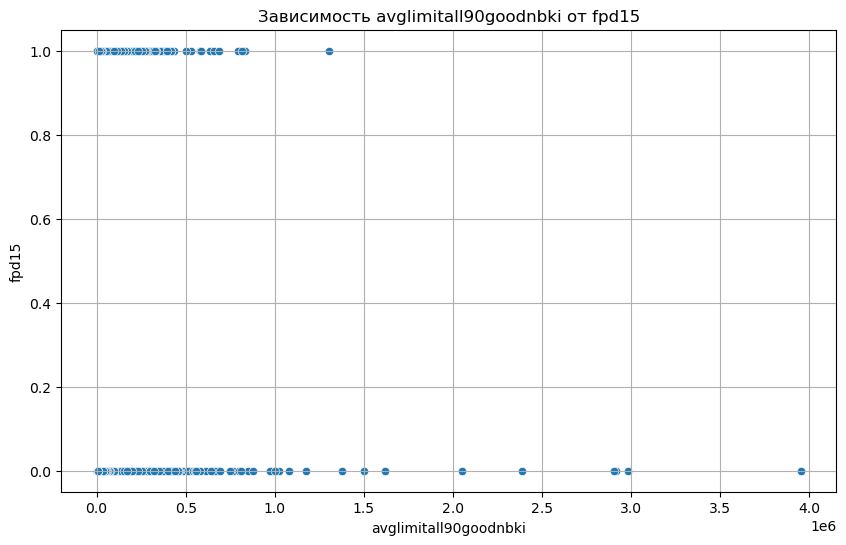

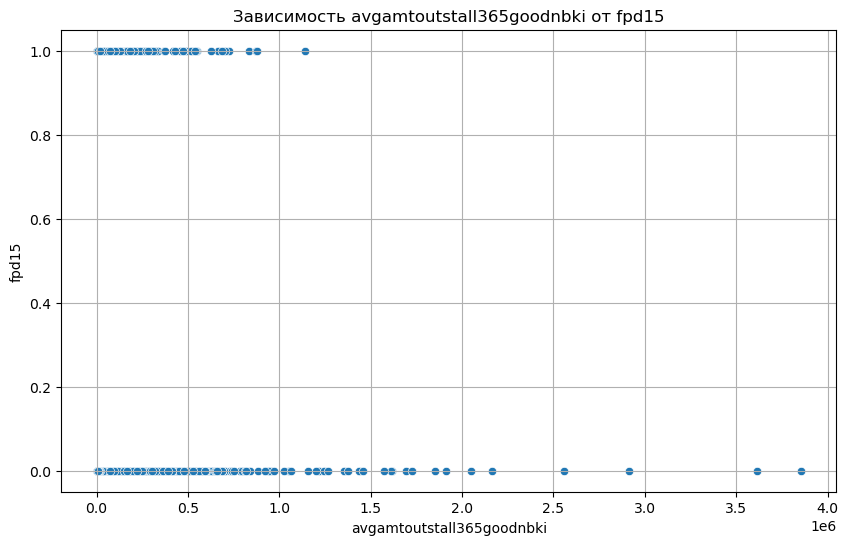

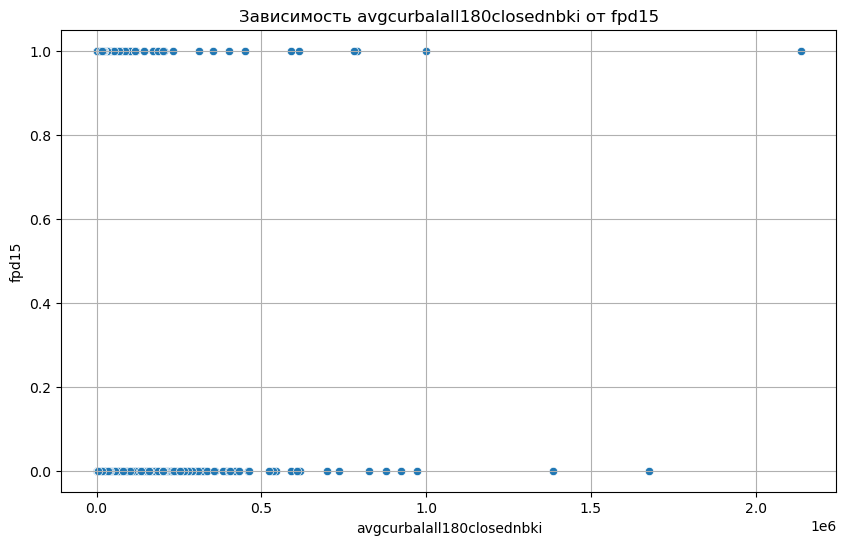

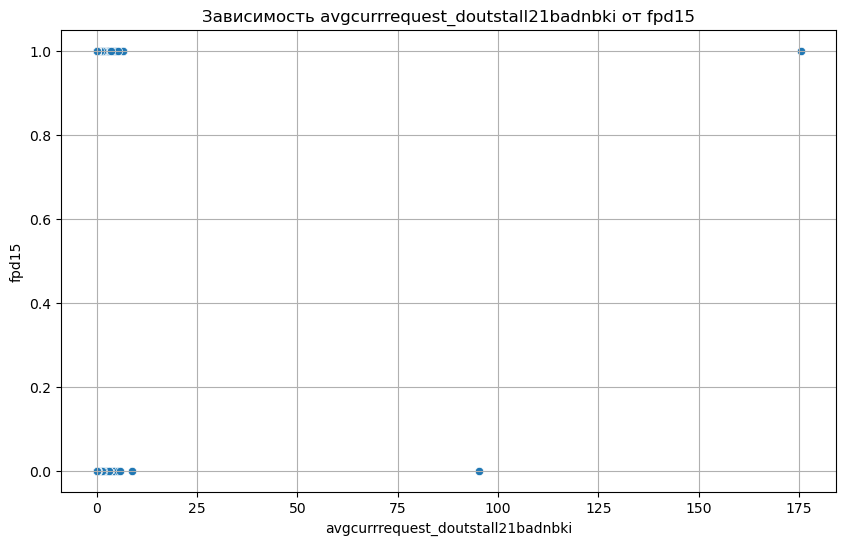

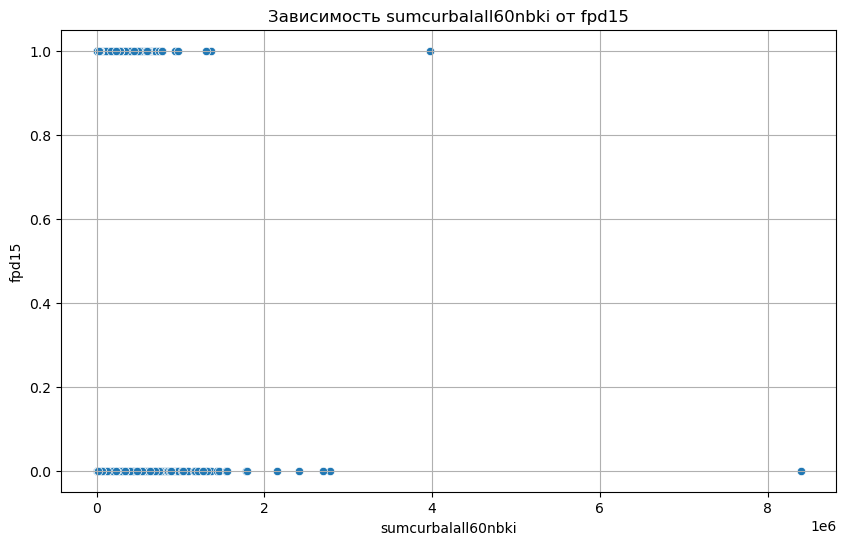

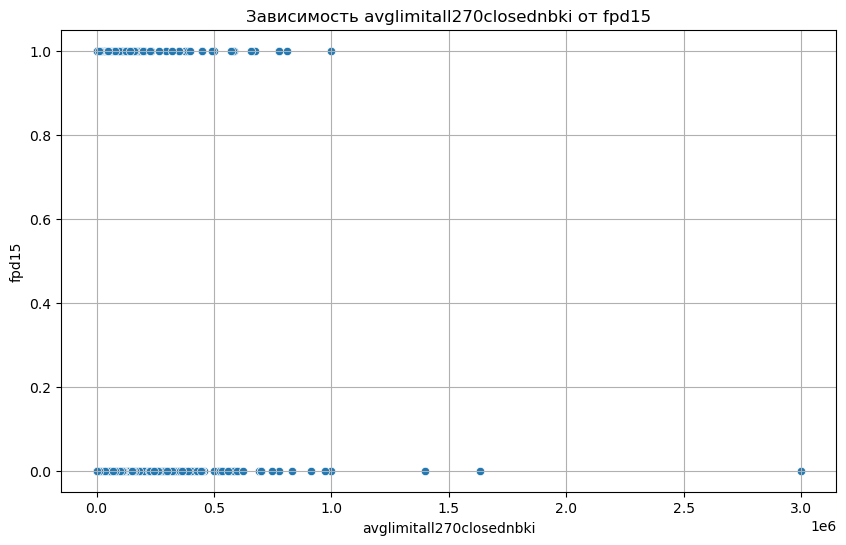

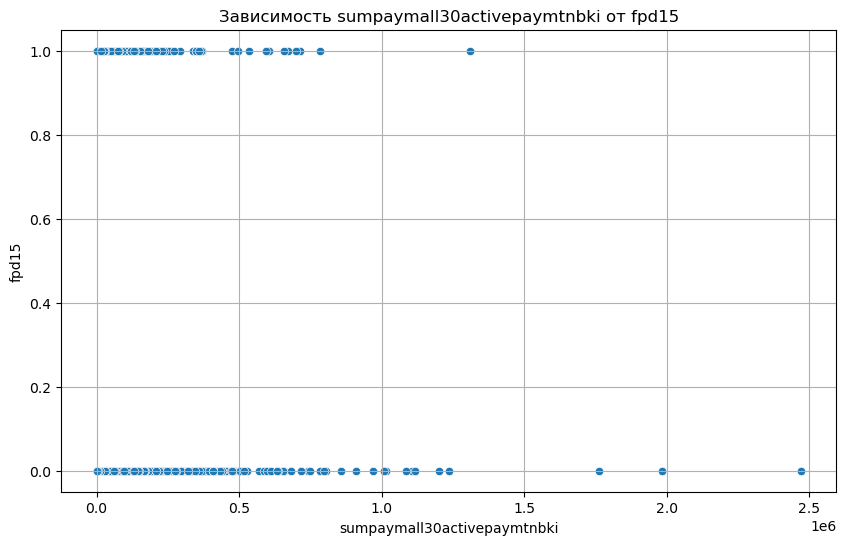

In [703]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_column = 'fpd15' 


for feature in final_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df[target_column])
    plt.title(f'Зависимость {feature} от {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.grid(True)
    plt.show()

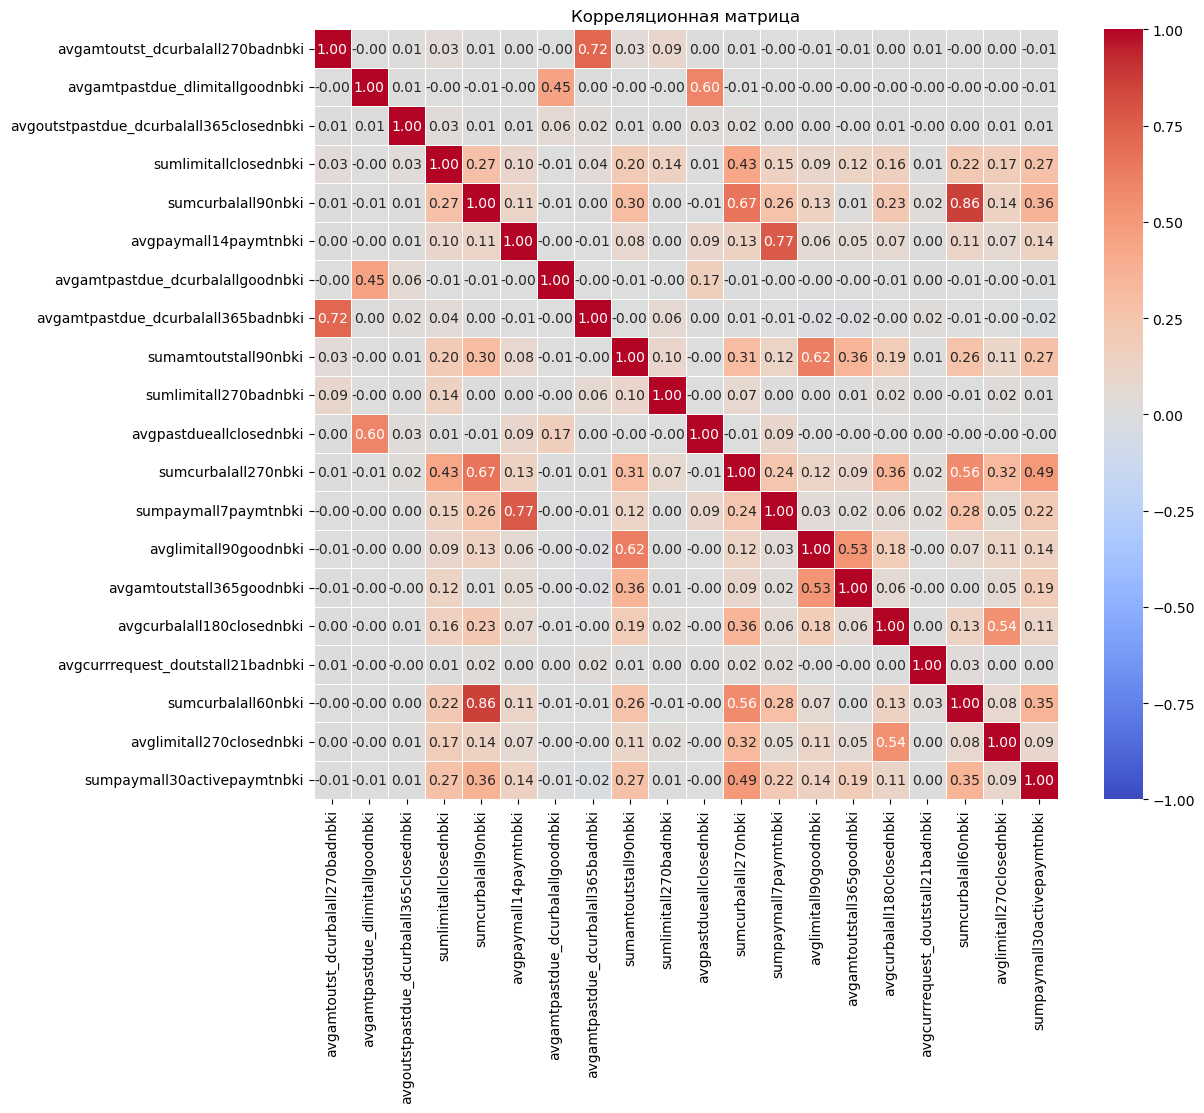

In [705]:

corr_matrix_train = df_train_filled[final_features].corr()


plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

corr_matrix_train.to_excel('correlation_matrix_train.xlsx', engine='openpyxl')

plt.title('Корреляционная матрица')
plt.show()


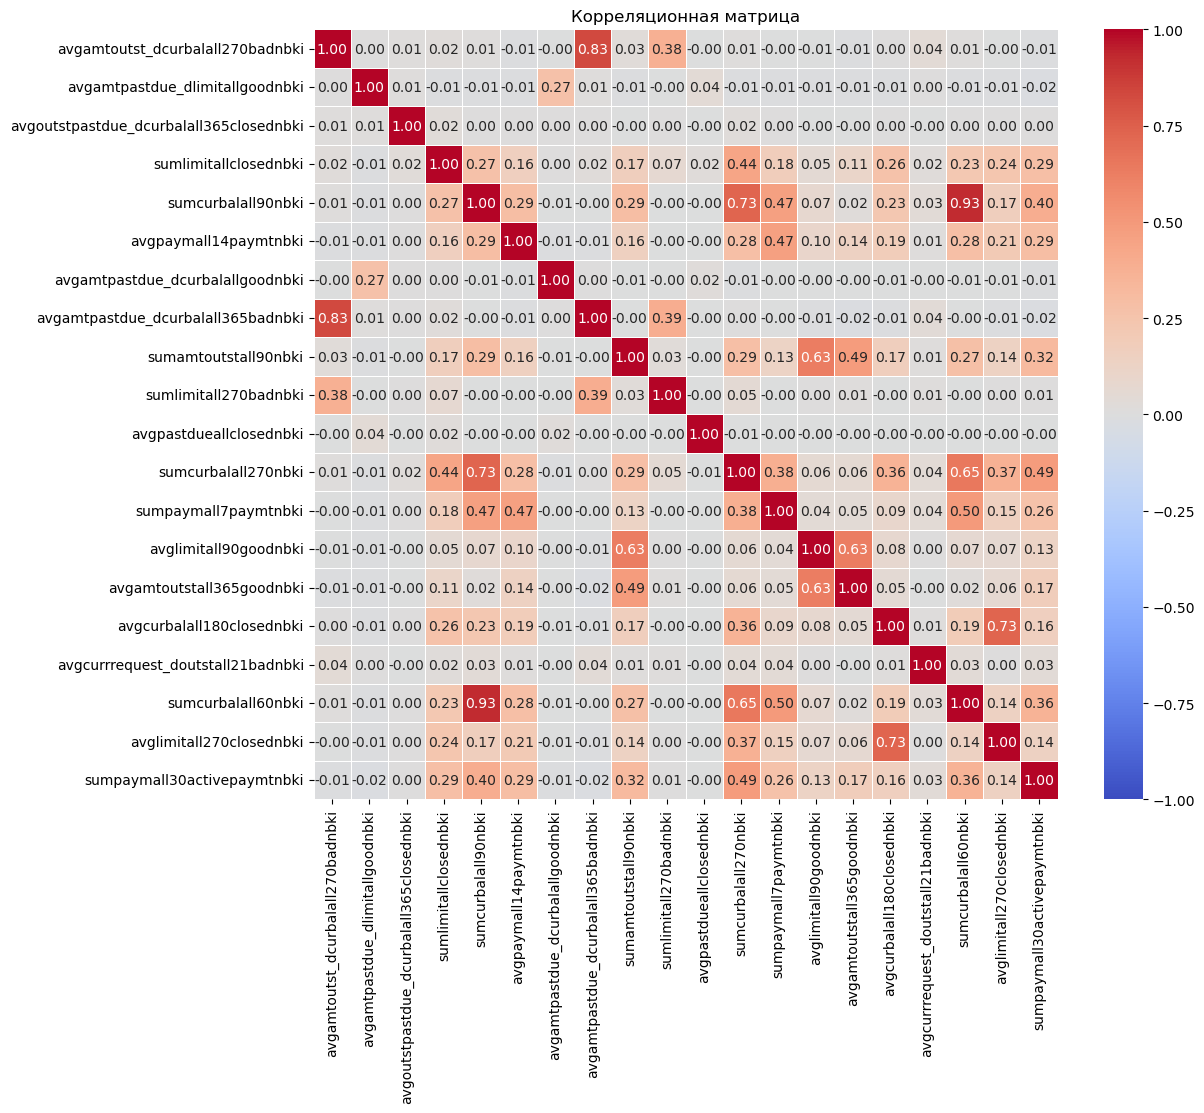

In [706]:
corr_matrix_test = X_test_20.corr()

plt.figure(figsize=(12, 10))


sns.heatmap(corr_matrix_test, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

corr_matrix_test.to_excel('correlation_matrix_test.xlsx', engine='openpyxl')

plt.title('Корреляционная матрица')
plt.show()

In [707]:
results_df = pd.DataFrame({
    'application_id_axi': df_test['application_id_axi'],
    'score': y_pred
})

results_df.to_pickle('C:\\ML\\тестовое задание 20240821\\test_oot_scores.pkl')


In [708]:
results_df

,application_id_axi,score
2591,6263684-1,0
2592,6263717-1,0
2593,6263719-1,0
2594,6263722-1,0
2595,6263727-1,0
...,...,...
37836,6335869-1,0
37837,6335879-1,0
37838,6335887-2,0
37839,6335902-1,0
